# Color Identification using Machine Learning

In this notebook, I have used machine learning algorithm, `KMeans`, to extract colors from a give image. I will use `OpenCV2` for image manipulation, apply `KMeans` to identify the major colors and then plot the information using `Matplotlib`.

## Import libraries

Let's first import necessary libraries. We need `sklearn` for KMeans algorithm, `matplotlib.pyplot` for plotting graphs, `numpy` to work with arrays, `cv2` to work with image data, `collections` to use Counter to count values, `rgb2lab` to convert RGB values and `deltaE_cie76` to calculate similarity between colors.

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Color Identification

Not that we know a bit about OpenCV, let's start identifying colors from an image.

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

In [11]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    modified_image = cv2.resize(image, (180, 390), interpolation = cv2.INTER_AREA)
    # plt.imshow(modified_image)
    # plt.show()
    return modified_image

def get_colors(image, number_of_colors, show_chart, save_chart=None):
    
    # modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    if save_chart is not None:
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.savefig(save_chart)
    rgb_colors = np.stack(rgb_colors, 0)
    # print(rgb_colors.shape)
    
    return rgb_colors

def entropy(image, save_chart):
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)

    R=modified_image[:,0]
    G=modified_image[:,1]
    B=modified_image[:,2]

    plt.figure(figsize = (12, 4))
    plt.subplot(131)
    plt.hist(R, density=True, color='r')
    plt.title('r')
    plt.subplot(132)
    plt.hist(G, density=True, color='g')
    plt.title('g')
    plt.subplot(133)
    plt.hist(B, density=True, color='b')
    plt.title('b')
    plt.suptitle('hist')
    plt.savefig(save_chart)

    ent = []
    for i in range(3):
        uniques, counts = np.unique(modified_image[:, i], return_counts=True)
        n=np.ones((256,)) * 1e-6
        for (u, c) in zip(uniques, counts):
            n[u] = c
        n /= n.sum()
        ent_ = (- n * np.log2(n)).sum(0)
        ent.append(ent_)
    return ent



/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


QQ邮箱1.jpg [[254.79300804 254.79519983 254.78778505]
 [169.64736842 171.38210526 182.92105263]
 [251.65034965 175.4965035   20.88111888]
 [ 78.71375465  78.71375465  78.71375465]
 [211.01067073 208.59146341 208.95121951]
 [240.21474984 240.90968161 242.57504873]
 [249.82517483 163.01398601 114.09090909]
 [127.94761905 127.94761905 127.94761905]] [61.92881845 54.11489204 77.071183  ]
entropies in r, g, b: [1.2102736966936847, 1.2231056743842383, 1.2398262499451296]
3.673205621023053


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


百度2.jpg [[249.98523672 250.27172917 250.73767181]
 [143.84618981 209.00935016 151.31556802]
 [119.61605351 116.15919732 113.93645485]
 [228.51668727 146.41718171 138.31149567]
 [ 21.93765586  22.01246883  22.39650873]
 [210.19764706 209.17470588 204.95470588]
 [111.31296703 171.97186813 239.03868132]
 [243.22533496 207.0091352  108.94579781]] [75.22124207 67.20395444 71.05739012]
entropies in r, g, b: [3.786202058674701, 3.8526976425697335, 3.880344881547813]
11.519244582792247


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


QQ邮箱2.jpg [[240.94116504 241.97851969 243.96011989]
 [200.63054187 208.30049261 215.06896552]
 [254.87245467 254.9054807  254.90409617]
 [120.26903553 120.30456853 120.38071066]
 [122.91139241 176.17721519 227.36075949]
 [ 67.58415842  67.61386139  67.72277228]
 [164.33333333 164.3974359  164.57264957]
 [246.69838057 249.69606709 251.36466165]] [65.04275682 62.57766263 64.49711451]
entropies in r, g, b: [1.9424010892689856, 1.8884987163812592, 1.8383326117863177]
5.669232417436563


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


微博轻享版1.jpg [[252.98489991 253.03400783 252.95089208]
 [103.67380509 104.40006207  91.50124146]
 [ 11.84826203  14.54723708   8.01715686]
 [191.60479313 189.28374407 178.15283744]
 [ 57.27378576  57.18829009  42.9491018 ]
 [161.3223114  125.46741573  86.44654896]
 [219.04134965 220.16440622 220.53324512]
 [144.75025312 147.96186298 144.55518056]] [76.38405576 75.63243189 80.35292592]
entropies in r, g, b: [4.7469167602698565, 4.732478626020814, 4.772180175563006]
14.251575561853677


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


美团2.jpg [[243.65175449 243.5927891  243.44091402]
 [167.38853188 170.03163618 168.43252595]
 [ 92.15884477  88.35980746  84.12755716]
 [254.86904173 254.87325579 254.84739094]
 [210.92403846 209.02259615 205.06057692]
 [237.08447937 199.95088409 100.00196464]
 [221.96524064 108.02406417  86.84224599]
 [131.88880249 139.84525661 127.55754277]] [54.80056685 57.11191721 65.00884877]
entropies in r, g, b: [2.5738117760167794, 2.5891000811031026, 2.64868583581576]
7.811597692935642


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


菜鸟1.jpg [[237.44910347 240.60338065 245.24897273]
 [ 43.30773894 100.90755708 243.31804405]
 [145.73715711 153.37456359 149.11970075]
 [197.72430355 200.32821005 201.91290426]
 [ 80.88636364  80.18636364  78.68181818]
 [229.16666667 140.85463659 103.50250627]
 [254.34247846 254.38485196 254.37196417]
 [129.85928705 169.04065041 236.47592245]] [72.37829252 58.0310928  65.07582874]
entropies in r, g, b: [3.819652061679054, 3.726968507294627, 3.6408074136481394]
11.18742798262182


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


知乎2.jpg [[252.46624922 252.71671885 253.04633688]
 [141.42985746 138.64591148 125.79444861]
 [175.33512352 187.97153598 201.5349087 ]
 [246.13977186 232.72212928 209.16197719]
 [229.47778785 198.55666364 153.43336355]
 [ 55.64173228 112.18503937 222.56496063]
 [226.28421564 238.6379796  251.93511413]
 [ 70.84690554  70.44462541  69.86807818]] [73.21237081 61.45813714 60.342067  ]
entropies in r, g, b: [4.22803709373925, 4.1394423144207115, 3.8065963752359977]
12.17407578339596


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


微博轻享版2.jpg [[254.88735777 254.88778153 254.88585106]
 [146.5869281  146.48496732 146.27058824]
 [183.00704225 182.32535211 181.41690141]
 [214.64591978 213.15352697 212.56569848]
 [112.55841584 110.07722772 106.08514851]
 [243.77019021 243.72528843 243.68038665]
 [ 49.33823529  48.30882353  47.05882353]
 [190.32741617 157.18540434 116.20907298]] [64.68802883 64.97142845 67.91264586]
entropies in r, g, b: [1.3233653574352455, 1.32459623049633, 1.3346420787447575]
3.982603666676333


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


美团1.jpg [[253.10992787 253.         252.5992219 ]
 [ 43.78132946  31.99527788  25.0770069 ]
 [211.97558946 133.3517337   98.31206657]
 [244.05067319 207.2753978   78.70208078]
 [160.60772634 161.61912866 175.73332199]
 [129.20026207 121.12557327 100.56802795]
 [224.91696323 209.29584816 211.75112693]
 [105.10463061  67.22269353  42.97631672]] [69.86027964 70.17835467 76.25684411]
entropies in r, g, b: [5.3652710472734935, 5.541181020929604, 5.71272279277964]
16.61917486098274


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


菜鸟2.jpg [[  2.73558462 102.64375334 253.36398825]
 [240.95549848 245.75851766 248.66180941]
 [167.9286314  167.0906801  161.80268682]
 [254.83474361 254.89674259 254.84330067]
 [ 94.55580866 155.76233865 240.26727411]
 [194.99793388 209.99724518 224.37190083]
 [245.80090498 123.73303167  46.18099548]
 [109.84452975 109.57773512 109.53934741]] [83.36838492 55.98540494 73.54991526]
entropies in r, g, b: [3.069171763979937, 2.8111636825831705, 2.7372746634645786]
8.617610110027686


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/7t/sm0wkww15ggf6rmql8ndxwrr0000gn/T/ipykernel_77331/2892068159.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8, 6))


IMG_4818.jpg [[250.78818361 249.97878367 249.39625968]
 [219.92201835 146.60754332  91.17023445]
 [198.40315013 181.55613271 170.69788874]
 [ 46.75617405  39.19404155  37.62054096]
 [122.19731318  99.34536804  82.65827036]
 [247.35887097 231.16998488 177.82951109]
 [129.35531697 139.48951943 152.00460123]
 [214.10103359 217.09612403 226.61421189]] [67.34984133 66.78738211 68.52301059]
entropies in r, g, b: [5.90191351243058, 6.2398652855865615, 6.426871189716041]
18.568649987733185


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


知乎1.jpg [[207.71546135 200.57817955 176.95      ]
 [254.1761174  254.19441843 254.16422893]
 [ 61.46203905 118.36008677 221.46420824]
 [ 21.44481132  24.42688679  21.82830189]
 [113.85639344 120.08295082 115.81442623]
 [167.60266715 166.23328462 159.08385093]
 [ 68.86898396  78.18516043  71.49264706]
 [226.28994725 228.00853242 221.4649395 ]] [80.46414933 72.94967852 75.34101825]
entropies in r, g, b: [4.7146548729166025, 4.696683329977759, 4.76536493483861]
14.176703137732972


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


支付宝2.jpg [[244.24068894 244.38510231 244.11423524]
 [ 24.18267687 120.81467838 252.77784075]
 [158.37730287 155.22549742 154.59027266]
 [254.73728093 254.75459919 254.73446023]
 [ 92.30487805  92.58231707  96.60670732]
 [208.57954545 207.06628788 204.48058712]
 [245.09701493 129.20149254  53.85820896]
 [117.44814815 174.11666667 244.36296296]] [79.04728862 55.18341828 73.06634887]
entropies in r, g, b: [2.6756712552487167, 2.6316089484542813, 2.4872632639806254]
7.794543467683623


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


支付宝1.jpg [[223.11325659 226.46249536 232.70813219]
 [ 59.3950064  119.25745381 242.97210536]
 [144.04238833 136.98495898 144.32680036]
 [250.51699348 250.58728415 250.65683441]
 [ 96.1980046   83.25095932  84.56638526]
 [229.35314685 140.14918415  84.71212121]
 [231.62379421 198.20192926 151.79614148]
 [178.25211159 183.74046583 198.10007679]] [65.86152584 53.25725281 63.25000293]
entropies in r, g, b: [5.2902921558129155, 5.251723566419308, 5.091109553185897]
15.63312527541812


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


拼多多1.jpg [[237.4227049  231.12964534 224.05328356]
 [ 93.85607256  82.32847003  68.52839117]
 [175.29933513 164.44065639 156.48351959]
 [253.52291063 253.51821505 253.41740199]
 [ 10.78477547  11.50821468  12.27710843]
 [225.55947955  93.36802974  89.96096654]
 [200.90989533 196.7056221  191.34822488]
 [135.68398169 133.89016018 121.68009153]] [77.31944428 76.46654765 76.72762426]
entropies in r, g, b: [5.632733674364557, 5.768071393603412, 5.835894299252938]
17.236699367220908


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


醒图1.jpg [[177.94049618 163.60548405 154.20443947]
 [252.76967289 252.67161703 252.69410585]
 [ 57.63379469  59.0745867   63.41657055]
 [212.3674946  201.79492441 199.02473002]
 [ 18.74509515  18.79333235  17.50685942]
 [151.22904368 185.12691854 206.61880165]
 [ 83.49361413 148.65244565 199.1673913 ]
 [116.31147541 111.45364613 109.41294517]] [74.54385549 71.74683338 75.23979192]
entropies in r, g, b: [6.454797092073554, 6.3015373148236, 6.138657989979354]
18.894992396876507


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


QQ2.jpg [[254.86077815 254.86083831 254.84662586]
 [111.21888412 112.65236052 116.81545064]
 [161.31313131 161.62914863 162.25829726]
 [244.26011561 196.41618497 115.70520231]
 [ 47.99487179  51.01709402  60.61367521]
 [242.74305556 128.45138889  33.625     ]
 [ 93.6187291  167.5451505  212.10033445]
 [209.56541219 210.59050179 210.96863799]] [74.00932077 59.2208122  72.79288586]
entropies in r, g, b: [0.9386598925261802, 0.9359142108346519, 0.954353638045887]
2.8289277414067193


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


大众点评1.jpg [[ 39.76064048  39.782811    27.77829479]
 [209.96001373 205.32349408 200.91007379]
 [154.05777564 148.72283743 142.15326593]
 [253.3720616  253.28721967 253.12041791]
 [160.22513089 181.79624782 231.13612565]
 [106.09821883 146.85877863 201.3778626 ]
 [232.22738095 133.24166667  74.82857143]
 [ 98.28248299  93.37908163  82.97993197]] [68.51446169 61.62925658 77.10792395]
entropies in r, g, b: [5.783313700743571, 5.747859197583955, 5.77781508262008]
17.308987980947606


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


拼多多2.jpg [[254.83179872 254.82648129 254.77358317]
 [191.37887067 133.94535519 111.06435944]
 [215.16739666 212.80399672 207.99315631]
 [191.00193573 182.59272164 176.9941928 ]
 [ 73.98598949  76.5061296   66.86077058]
 [145.33004141 145.37177445 140.83657216]
 [208.99076517  59.02638522  45.84828496]
 [246.72684211 239.43118421 238.85342105]] [54.61894645 67.62464285 72.53486021]
entropies in r, g, b: [3.813886661471936, 3.930322467936595, 4.01953066522779]
11.763739794636322


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


醒图2.jpg [[254.89016022 254.89820133 254.87247582]
 [ 87.73873874  87.74774775  87.61261261]
 [165.4151436  224.55483029  43.57832898]
 [190.99351351 190.99351351 190.96540541]
 [ 16.51870748  16.51870748  16.51870748]
 [221.509113   221.92345079 220.55285541]
 [208.42857143 237.42285714 146.24571429]
 [145.70465116 145.70697674 145.59534884]] [72.56033161 78.04630116 78.75336412]
entropies in r, g, b: [0.9176977309482197, 0.9058248842846502, 0.9461820574328156]
2.7697046726656858


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


QQ1.jpg [[254.48204316 254.50354264 254.51034371]
 [148.72530864 139.13168724 143.10390947]
 [103.70630202 177.76575505 214.99643282]
 [201.84279681 202.89300798 204.66682309]
 [250.22037037 188.20925926  41.34814815]
 [241.22822967 242.37368421 242.87695375]
 [ 81.00174216  81.99303136  85.20731707]
 [ 15.81301483 147.69439868 244.86326194]] [83.44602893 52.8598045  75.09009731]
entropies in r, g, b: [3.2112644814999434, 3.1476024760857984, 3.08178113600476]
9.4406480935905


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


夸克2.jpg [[246.47194638 246.61308342 246.98700761]
 [134.86244541 160.93231441 231.68122271]
 [ 68.48496994  68.38276553  67.38877756]
 [137.14484272 130.01170446 125.10826628]
 [ 47.0012987   92.07922078 241.01298701]
 [185.8016     177.6784     165.3128    ]
 [254.75206278 254.76591557 254.75476269]
 [214.04132231 213.80116675 213.7063685 ]] [72.74127081 64.30432668 63.35619217]
entropies in r, g, b: [3.075744846413346, 3.0694243975805255, 3.019997023826198]
9.16516626782007


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


大众点评2.jpg [[237.58058925 151.09618718  77.31889081]
 [245.07097492 244.83110718 244.71675506]
 [245.87979381 213.40041237 191.95257732]
 [157.90678733 154.14932127 152.12488688]
 [254.71973684 254.5930127  254.43938294]
 [248.47242262 231.63311613 226.02594834]
 [199.86278586 196.         195.08177408]
 [103.17307692  97.65811966  95.47435897]] [51.19375864 50.93278081 61.92957878]
entropies in r, g, b: [3.2218163379168003, 3.7427113987419647, 3.9456397729550785]
10.910167509613842


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


饿了么2.jpg [[244.66006395 247.54511425 249.41967558]
 [ 44.96146527  51.41738027  68.93307961]
 [157.23058824 161.56705882 159.79      ]
 [215.25371604 208.76319836 197.76063557]
 [232.64432432 127.02918919  92.72216216]
 [121.97264438 205.08206687 245.13069909]
 [106.11946592 107.75895994 114.24244554]
 [254.30582707 254.6681391  254.81130952]] [71.41611621 66.86444371 70.04482178]
entropies in r, g, b: [3.958340720676048, 3.81016903818718, 3.6991815108235455]
11.467691269686775


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


美图秀秀1.jpg [[ 52.70528518  95.64800345  98.37211592]
 [235.19376317 229.50720607 221.74681837]
 [144.00977808 182.85749511 185.253975  ]
 [231.76735834 103.06823623 147.20510774]
 [252.79778462 252.38498462 251.70209231]
 [111.87854406 136.7789272  140.31800766]
 [198.83179659 203.69921766 205.96241967]
 [188.07234279 133.68725654  85.86143573]] [64.71936699 54.76898807 55.24935929]
entropies in r, g, b: [6.047597647987569, 5.934530724357025, 6.019921172797915]
18.00204954514251


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


剪映2.jpg [[246.44856716 246.44582607 246.44218789]
 [122.19959304 132.43655198 112.91120977]
 [241.47160989 197.40614562  44.97862391]
 [244.89329406 227.13411871 210.62143181]
 [144.17911877 118.11494253  69.46072797]
 [121.49213012 151.9003148  142.81091291]
 [ 90.94838866 112.1109765  103.44947904]
 [198.96995927 184.37372709 167.52749491]] [59.82738433 47.21688641 64.32164335]
entropies in r, g, b: [4.499267573680852, 4.519537374429636, 4.718019597994039]
13.736824546104529


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


微信1.jpg [[236.50057508 236.53609373 236.48458974]
 [124.88640179 123.84107443 121.3463906 ]
 [ 68.15228426  65.23350254  64.24703892]
 [207.01204819 206.88915663 205.79060241]
 [250.99452666 251.00952767 250.98357997]
 [ 45.982      170.366       74.902     ]
 [227.57268722 107.37444934  75.44493392]
 [168.31369248 168.03928171 164.27328844]] [73.60495184 60.48255281 71.0290669 ]
entropies in r, g, b: [3.109742347485105, 3.0908345948485456, 3.132026737443491]
9.332603679777142


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


饿了么1.jpg [[251.82041259 252.35275872 252.67318192]
 [214.00731031 189.8053945  170.92664482]
 [232.58549687 159.39391226  98.38764548]
 [138.1408635  158.62320105 115.98081116]
 [237.86560606 226.75393939 220.20621212]
 [ 79.19411765  65.78991597  60.54033613]
 [221.66674419  86.65953488  64.31604651]
 [132.97832168 206.77552448 240.18531469]] [58.8505432  61.00308538 73.43410966]
entropies in r, g, b: [4.65033166602747, 4.938022891856556, 5.073876961253239]
14.662231519137265


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


美图秀秀2.jpg [[227.24954573 200.07147184 210.72016959]
 [246.2762176  245.8528043  247.56106074]
 [215.48810048 101.71000441 142.14565888]
 [ 71.64022663  68.72521246  80.68555241]
 [244.15155474 229.04037105 245.42428795]
 [254.91917541 254.92130954 254.92707624]
 [194.45424837 169.28649237 184.18409586]
 [128.64182195 124.28571429 137.38923395]] [60.88048647 65.40465533 59.19819949]
entropies in r, g, b: [3.606767550618211, 4.216878304419245, 3.906317375344798]
11.729963230382253


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


剪映1.jpg [[ 24.31791877  23.95305485  24.11093575]
 [ 82.12777191 149.96515312 145.21436114]
 [221.39888424 190.10390516  73.24965132]
 [150.45173962  38.56565657  59.48204265]
 [ 45.07646048  51.95303551  52.09221077]
 [220.41411765 219.96705882 219.54588235]
 [ 94.50254777  24.23566879  40.21146497]
 [ 57.61729352 100.73284219  98.50601008]] [72.04440392 72.98449265 60.58579119]
entropies in r, g, b: [2.4513618847237755, 2.4289372160439933, 2.448794560342498]
7.329093661110266


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


微信2.jpg [[254.866645   254.87474813 254.86380674]
 [101.68632075 102.36792453  92.95283019]
 [236.79436949 236.79994811 236.70096004]
 [189.57913669 194.76378897 192.35611511]
 [ 48.          38.63802083  40.46875   ]
 [146.2944     143.1568     138.928     ]
 [245.38823529  91.92941176  88.27058824]
 [244.99299028 245.03616377 244.96463279]] [72.47409042 76.0029715  77.06245175]
entropies in r, g, b: [2.049896601847725, 2.04557334162592, 2.062807506102521]
6.1582774495761665


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


阿里巴巴1.jpg [[251.9506343  251.37381627 250.76682748]
 [123.53852295 102.66147705  78.90818363]
 [141.34300341 140.23788396 159.53037543]
 [177.52973376 187.667579   185.26051257]
 [ 50.67037367  34.65747331  30.34608541]
 [216.31028738 162.32840483 125.38837984]
 [229.81553565  89.50275577  66.0473648 ]
 [228.3399518  216.46849535 211.42258694]] [63.90974518 66.64935111 71.78100865]
entropies in r, g, b: [5.518754136855957, 5.896463006119111, 6.014648917689343]
17.429866060664413


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


京东1.jpg [[251.43237419 249.67467978 248.95896315]
 [140.19698142 148.2623839  137.23490712]
 [228.67191468  85.624344    69.41273066]
 [ 54.76035998  57.00355797  58.50460444]
 [226.91086177 191.33645005 165.37572074]
 [104.67744021 149.1247576  212.54492566]
 [234.57806497 226.68005589 219.95904645]
 [234.17837601 152.71700591 104.80236376]] [69.25700708 61.10537491 66.96236134]
entropies in r, g, b: [5.828000024522431, 6.621071067122773, 6.730031294740483]
19.179102386385686


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


阿里巴巴2.jpg [[254.72131193 254.72400078 254.67915861]
 [225.56661515 156.96877898  97.74126739]
 [ 89.86974615  69.39367457  54.61922597]
 [243.8468824  239.64665169 238.62248801]
 [155.13688402 162.8678447  158.54106521]
 [ 27.24364407  22.67372881  19.49011299]
 [216.2057159  207.94453877 196.97396718]
 [131.04853801 115.23859649  96.24122807]] [76.12373486 76.14508949 80.60664828]
entropies in r, g, b: [4.094980923476247, 4.433348901528721, 4.532555051057284]
13.06088487606225


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


京东2.jpg [[212.19482918  88.91320406  75.24192059]
 [242.33119345 239.37591555 238.49879362]
 [246.85667293 221.36442669 154.41729323]
 [144.30688753 147.51176983 144.33827376]
 [ 59.03046875  53.790625    53.06328125]
 [254.57154029 254.3350538  254.28243869]
 [229.81137441 185.77124803 102.18988942]
 [197.8515625  194.50985054 193.69870924]] [62.20976301 67.00452843 68.83710971]
entropies in r, g, b: [4.46126033415593, 4.776375226664136, 4.960440774929103]
14.198076335749171


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


淘宝2.jpg [[243.103942   242.78956572 242.53792626]
 [241.04       170.356      135.865     ]
 [172.39547635 175.46264565 178.24468814]
 [254.71208102 254.73105121 254.66233062]
 [247.9377494  110.70949721  31.99122107]
 [225.05832984 212.68862778 205.32773815]
 [ 81.24738676  79.32229965  79.21777003]
 [129.91828794 127.69649805 127.65272374]] [60.45101364 58.98484906 72.99551727]
entropies in r, g, b: [3.103749363133618, 3.270210520225649, 3.367256715081327]
9.741216598440595


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IMG_4692.jpg [[254.44077064 254.45345185 254.43036973]
 [ 88.68771396  96.57740586  87.05667554]
 [118.26396115 172.35900104 239.21314603]
 [174.19536153 176.88867667 169.4324693 ]
 [ 34.49443758  44.2750309   60.53491965]
 [136.55864902 137.36718393 131.39525331]
 [215.58322093 217.41273267 217.11788508]
 [108.52214695 148.10187598  94.1258468 ]] [66.33619739 61.83809041 69.66512799]
entropies in r, g, b: [4.420295755854594, 4.3781331838364235, 4.3740013319062925]
13.17243027159731


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


轻颜2.jpg [[254.94502806 254.94492102 254.94521155]
 [ 36.23908918  36.25110689  36.26059456]
 [196.02907712 195.27054362 195.58533502]
 [119.48396501 119.30612245 119.41982507]
 [231.51831993 231.44057194 231.48436104]
 [  5.92369478   5.92369478   5.92369478]
 [161.67895879 162.06290672 162.07375271]
 [ 78.99227799  77.93822394  78.27027027]] [85.09409554 85.12171942 85.12407138]
entropies in r, g, b: [0.9265629875785425, 0.924521053767983, 0.9233872615230849]
2.7744713028696104


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


IMG_4687.jpg [[254.8176094  254.81970826 254.85690299]
 [109.43191489 109.06170213 111.65744681]
 [207.28097345 203.94358407 208.34513274]
 [ 46.70826011  46.81195079  49.99824253]
 [ 56.53784861  91.77290837 225.13545817]
 [156.90247074 157.05851756 157.4603381 ]
 [227.54878049 110.7195122  106.72764228]
 [127.38888889 162.53472222 241.40972222]] [72.34319148 62.10936776 69.61751756]
entropies in r, g, b: [0.8632368343716137, 0.8597509076089516, 0.8625014644945781]
2.5854892064751436


/Users/rechel/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


轻颜1.jpg [[254.69169304 254.69791937 254.70155139]
 [  5.36714568   3.27930169   2.51331542]
 [117.60815603 116.7393617  117.46453901]
 [205.27647715 215.86733556 215.87848384]
 [ 63.26062323  61.65439093  63.90934844]
 [164.93914807 164.40365112 166.37119675]
 [239.62935553 239.48689485 239.57878508]
 [233.04519774 190.62711864 204.09322034]] [84.98704285 83.16475168 83.83251146]
entropies in r, g, b: [3.961346110093359, 3.428650158875171, 3.3546321710407145]
10.744628440009244


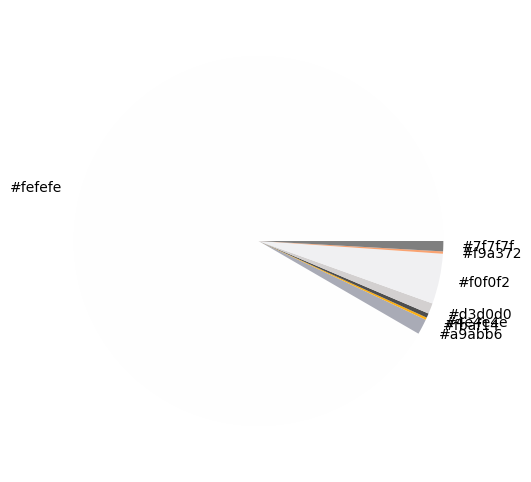

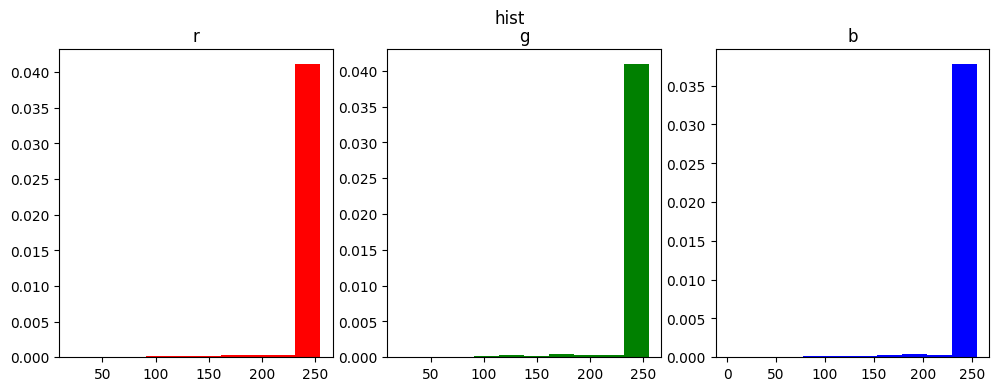

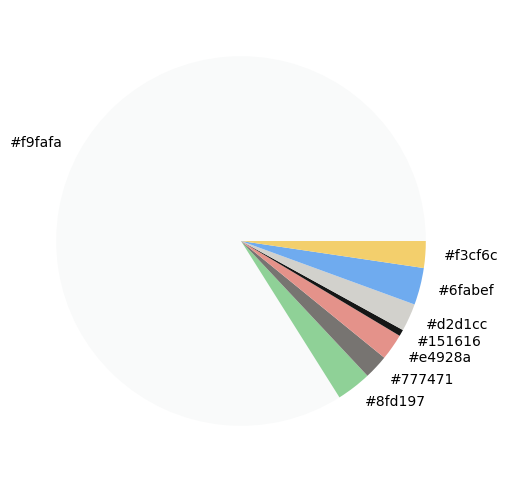

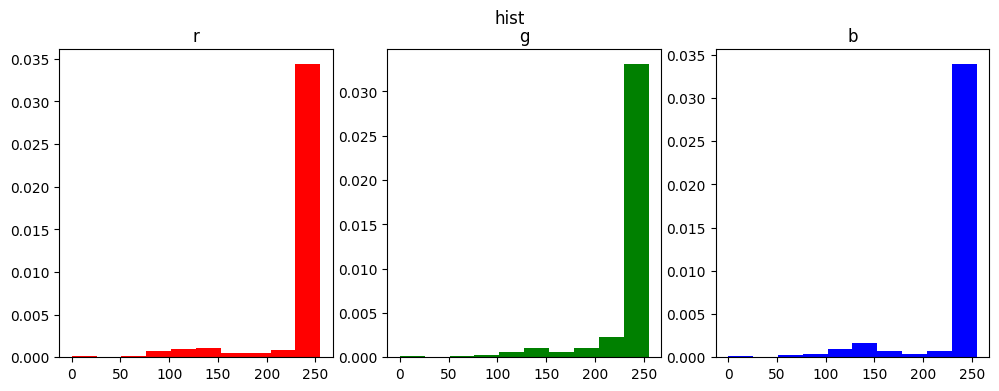

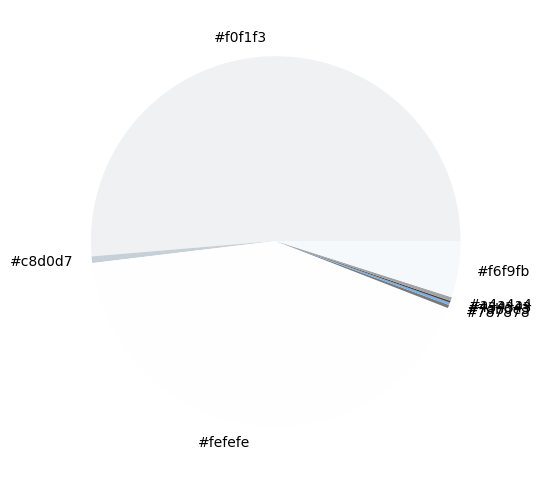

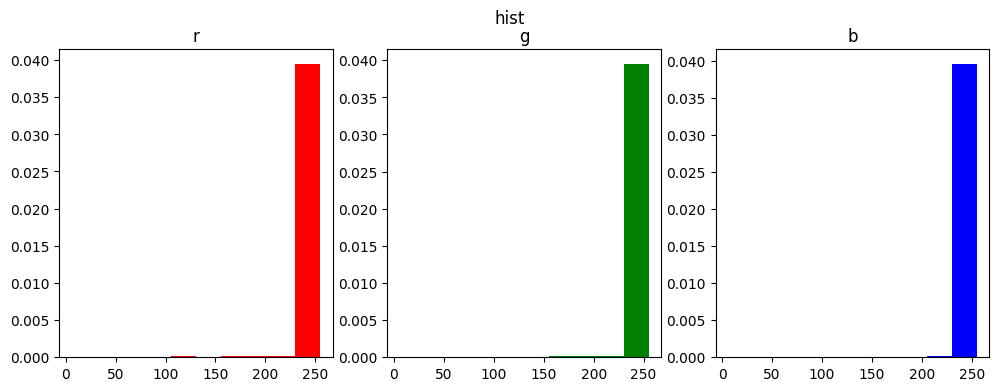

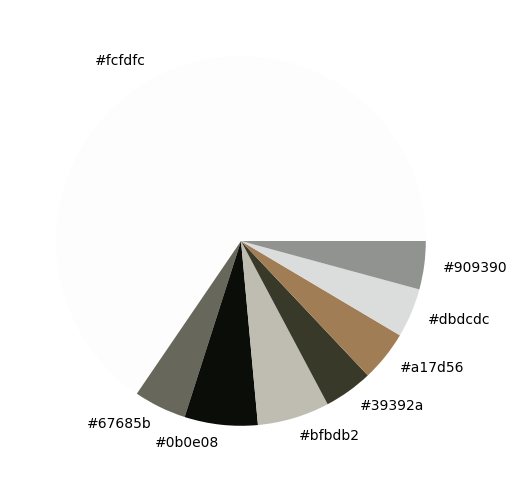

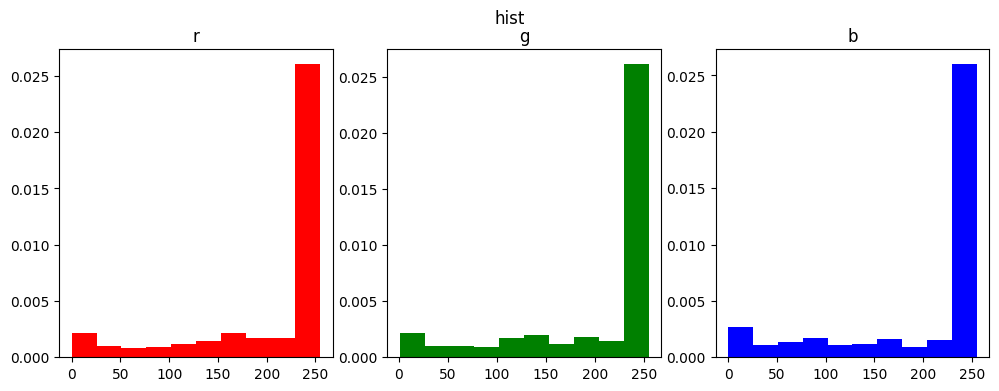

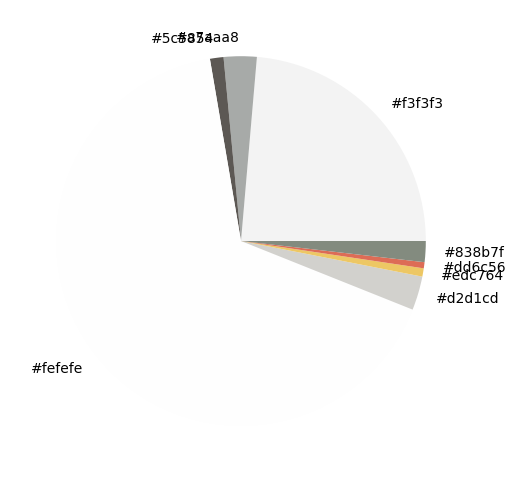

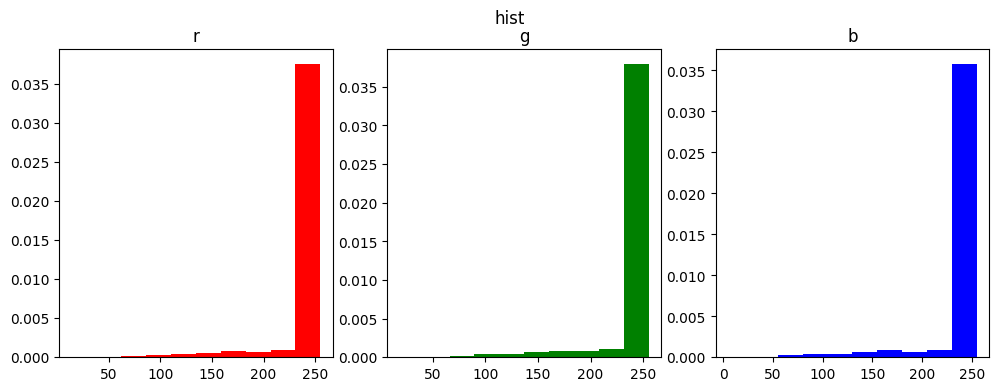

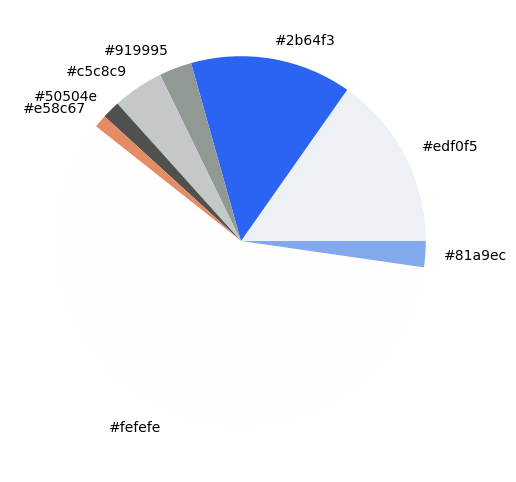

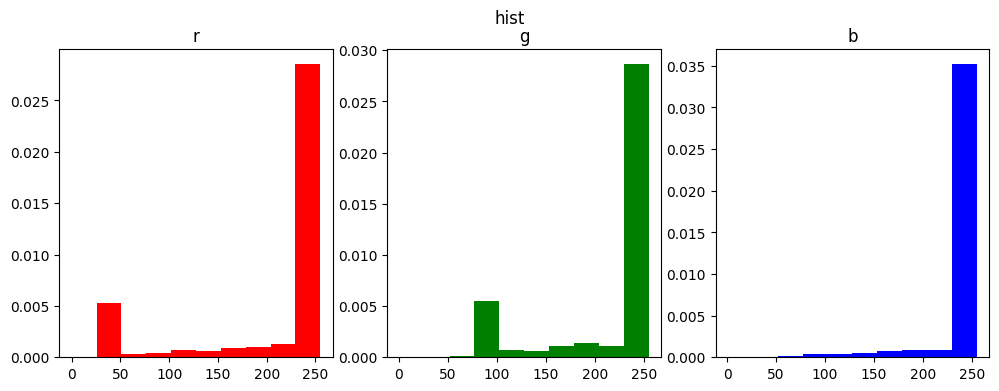

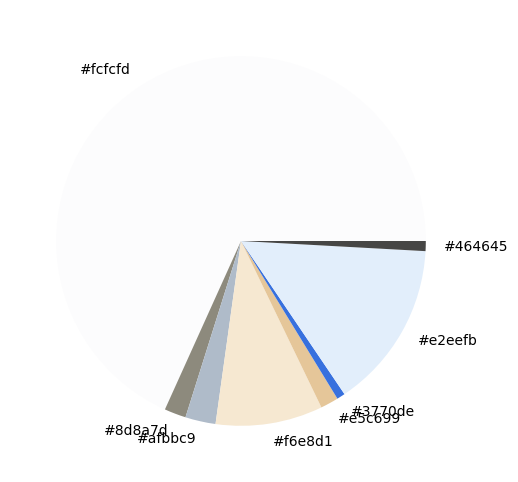

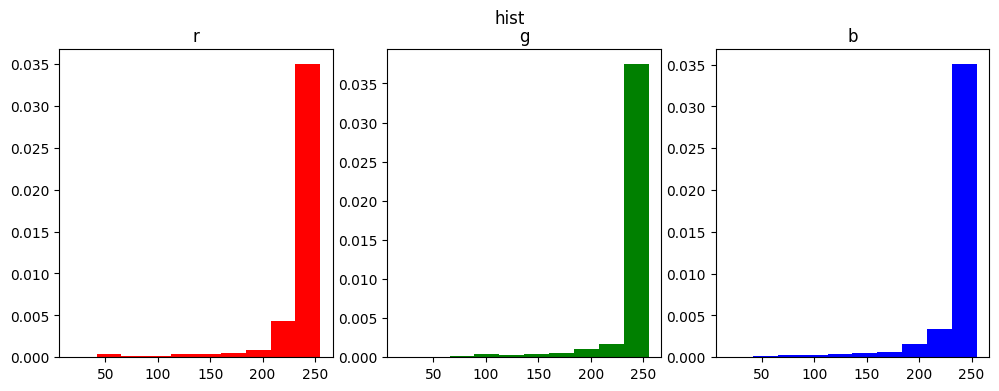

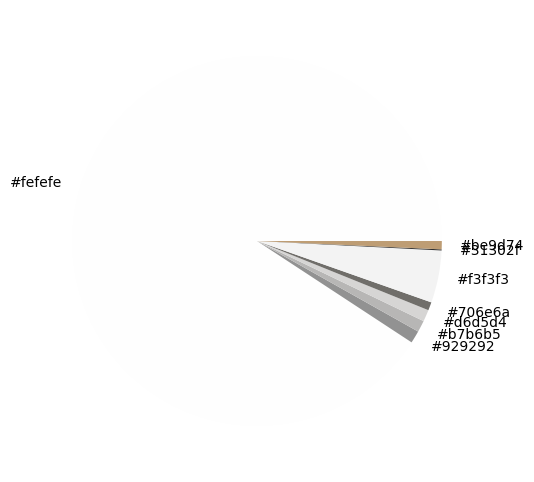

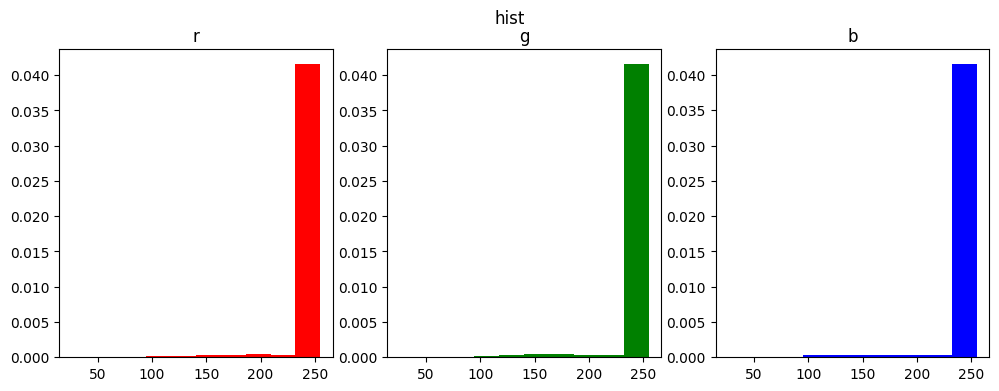

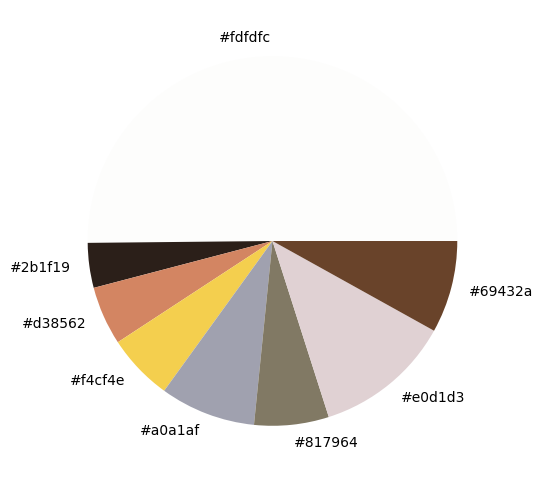

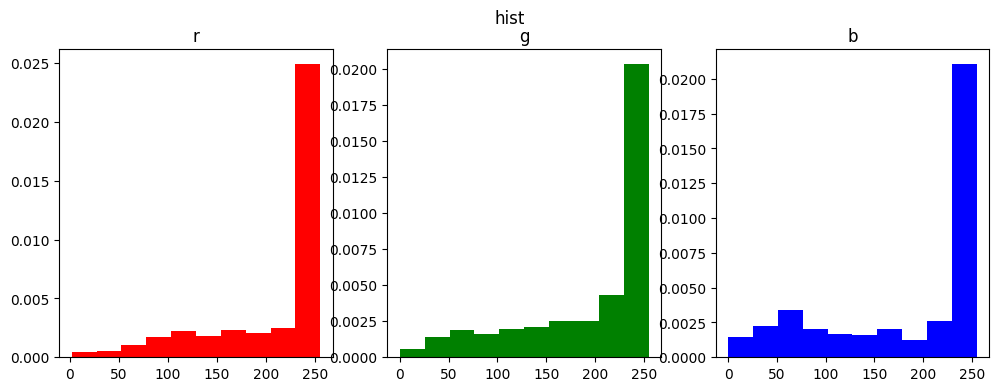

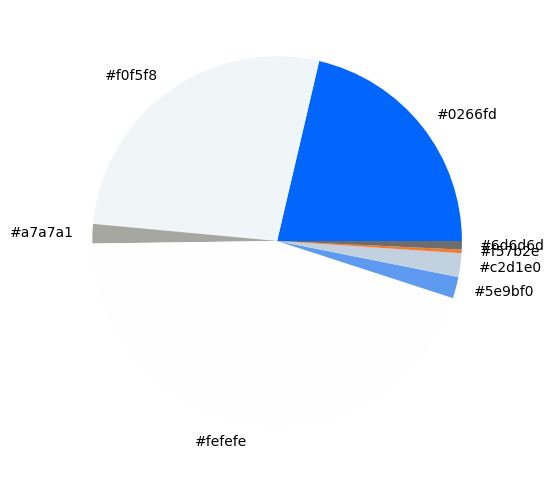

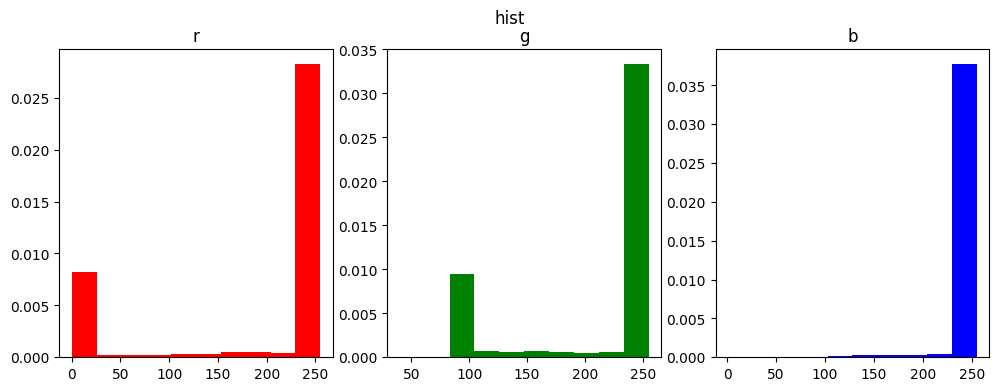

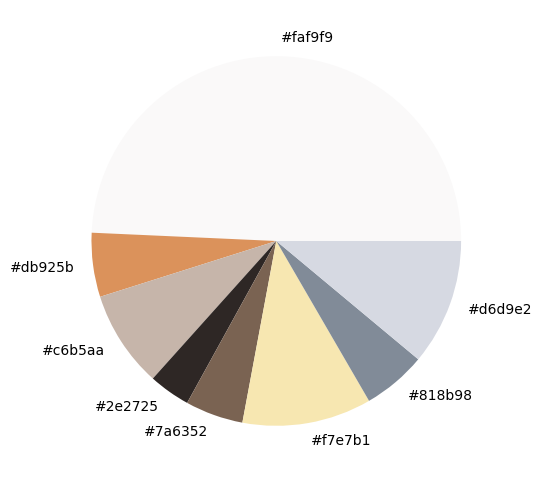

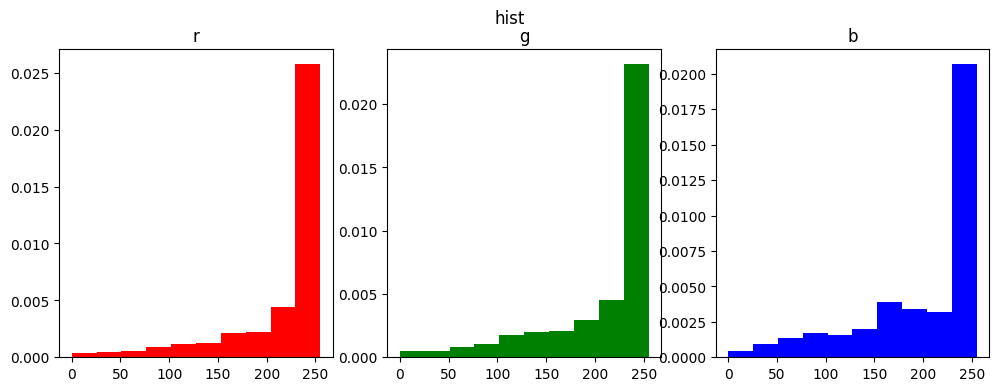

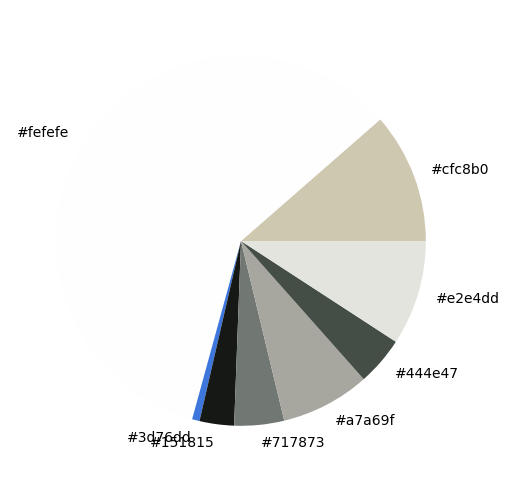

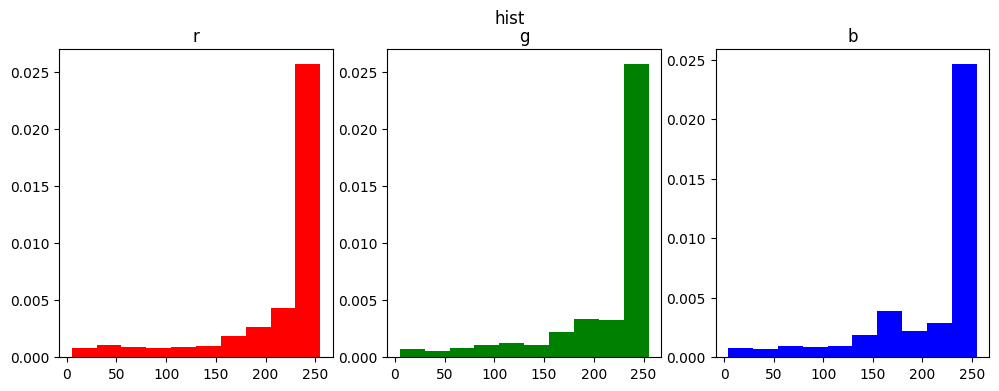

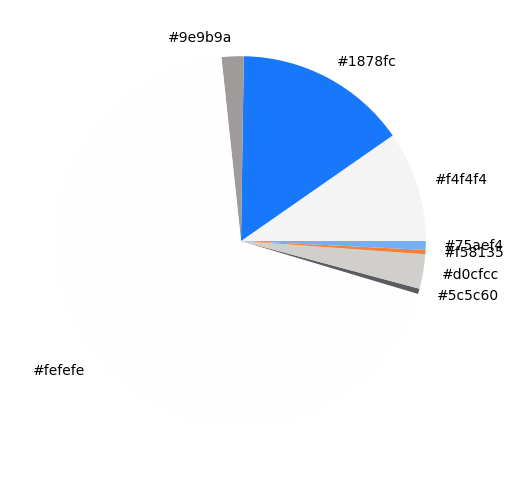

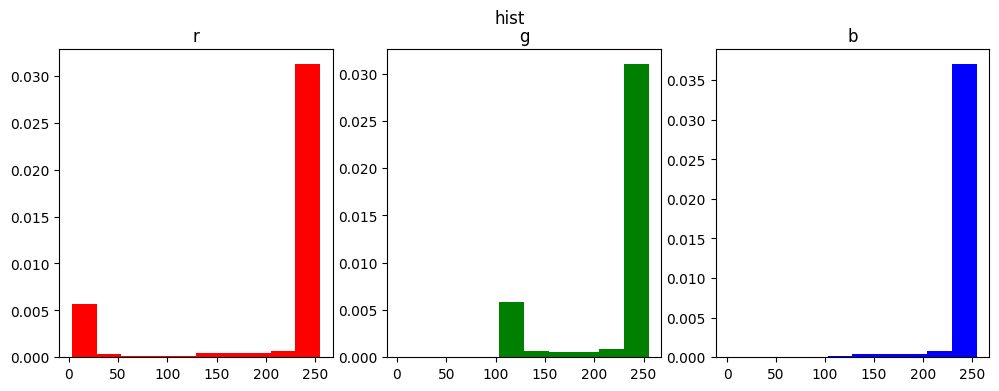

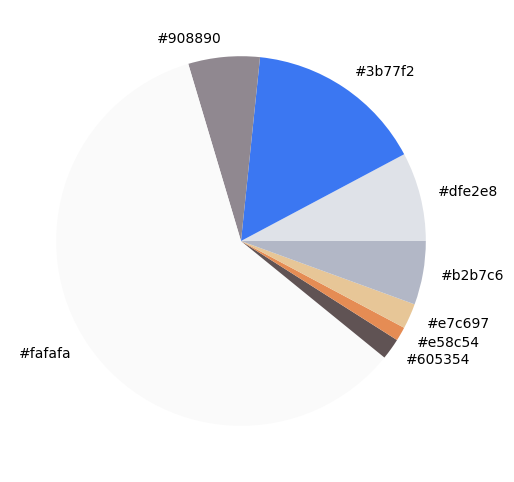

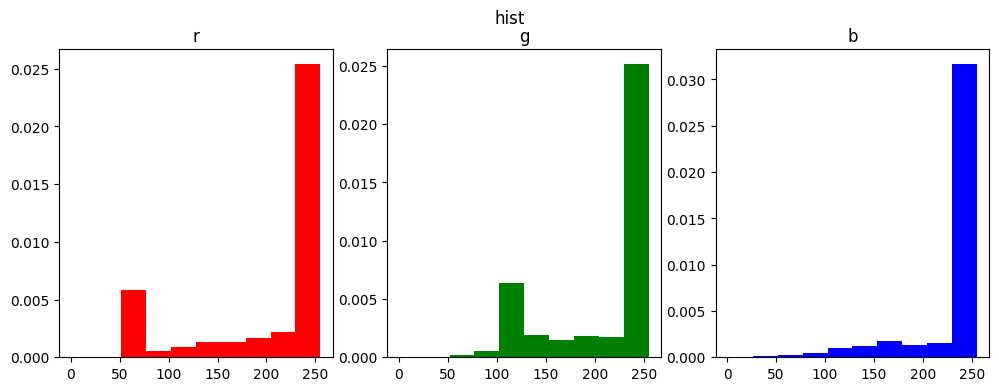

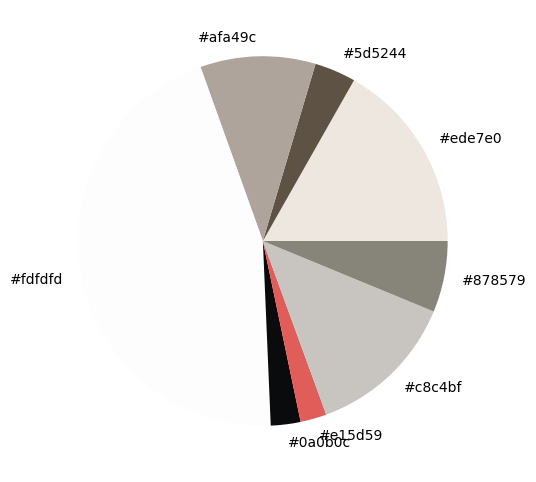

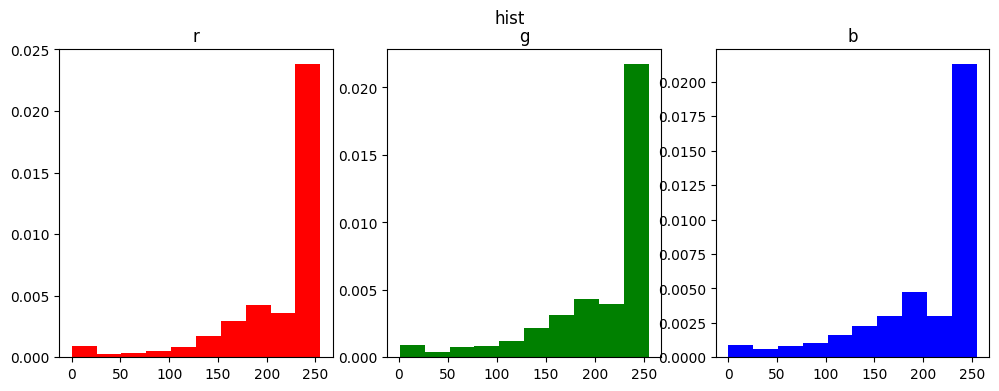

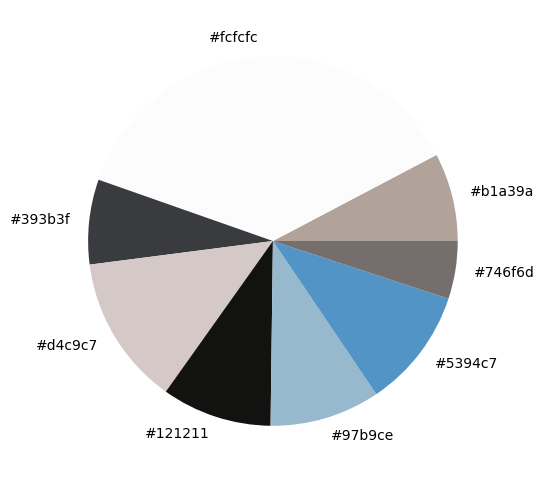

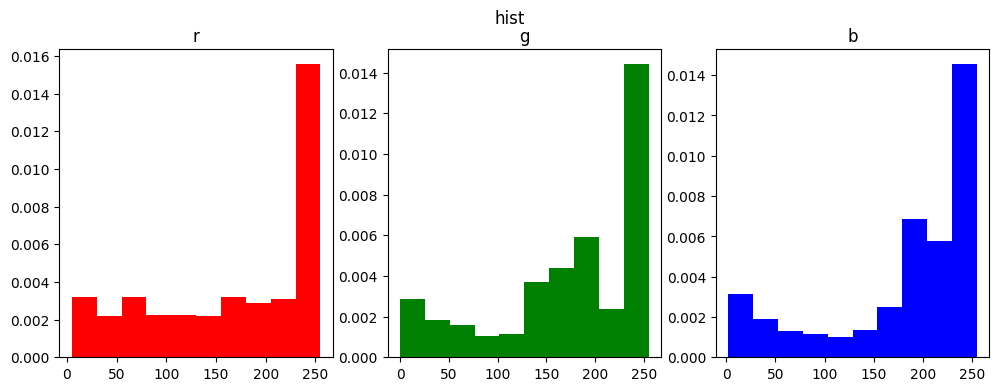

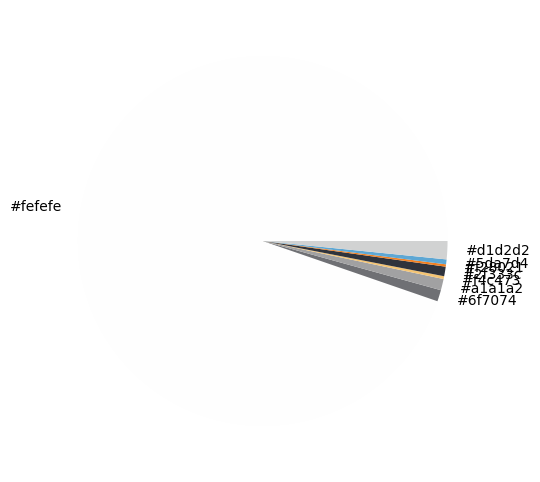

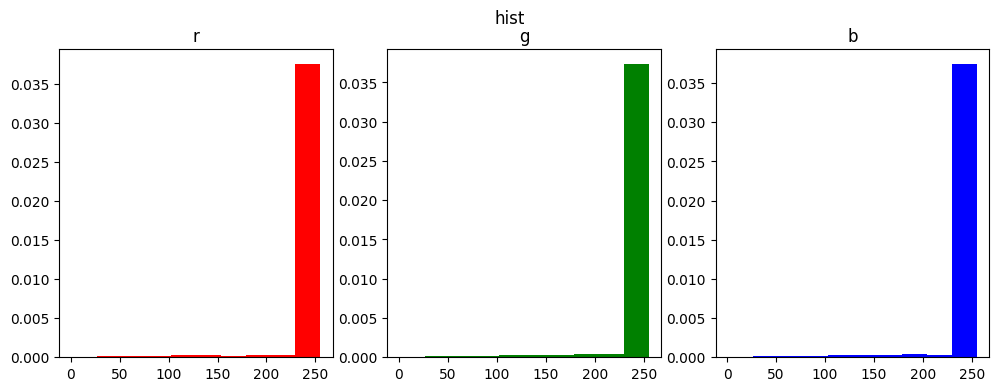

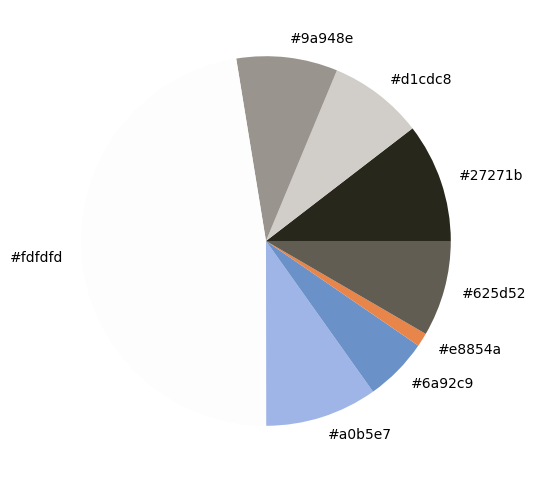

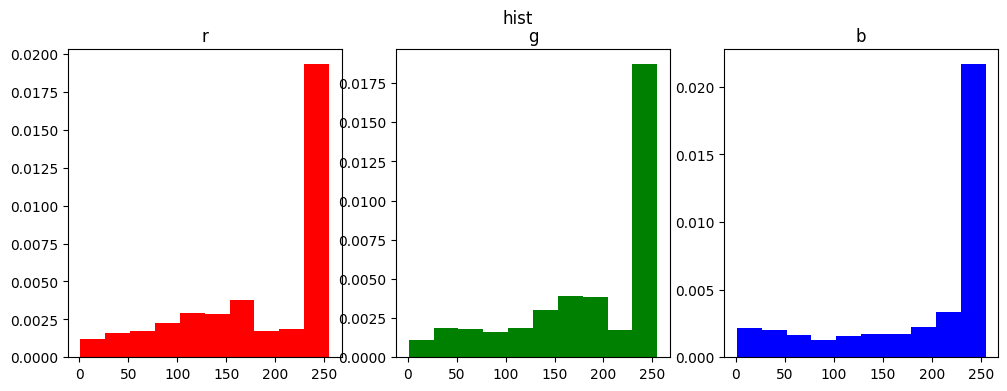

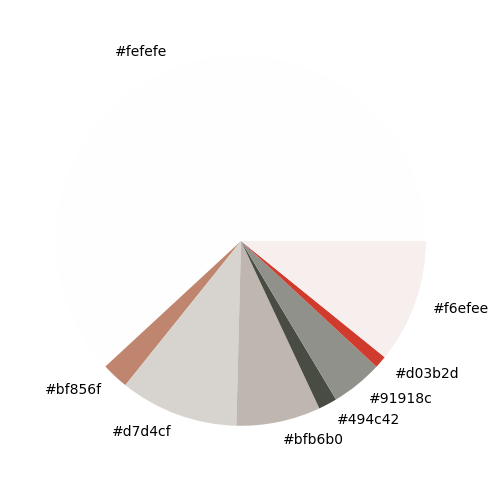

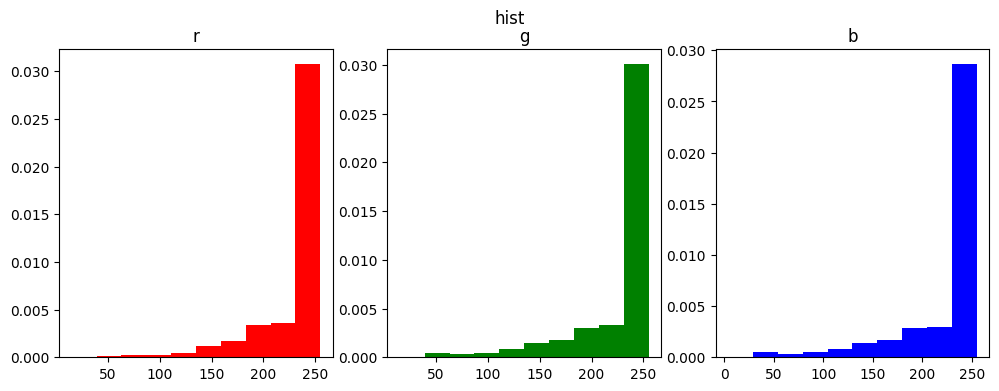

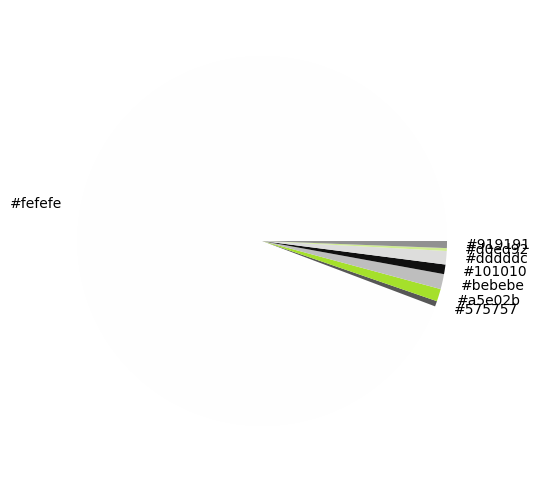

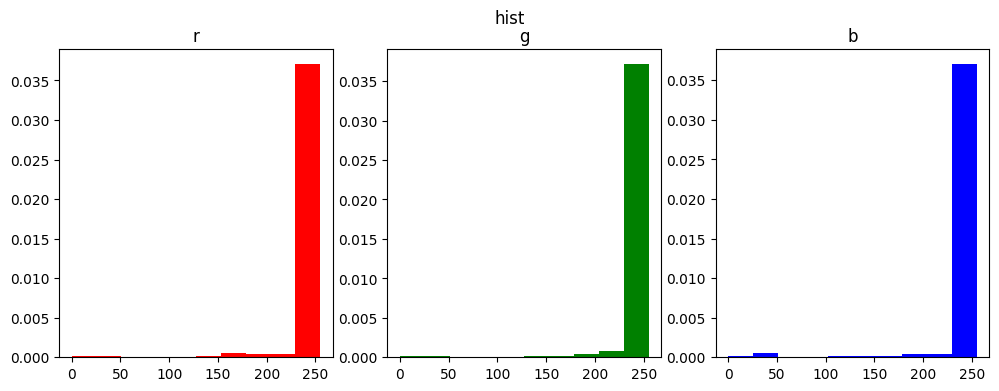

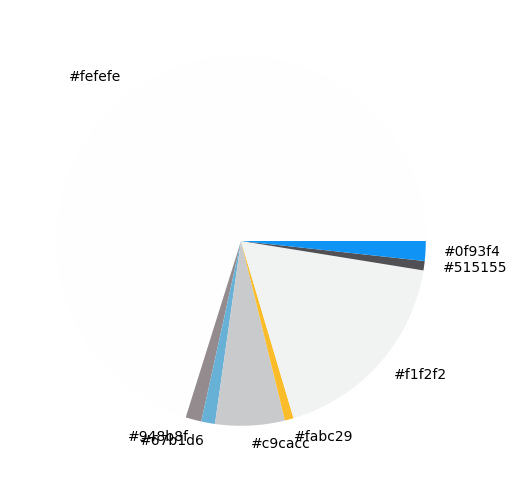

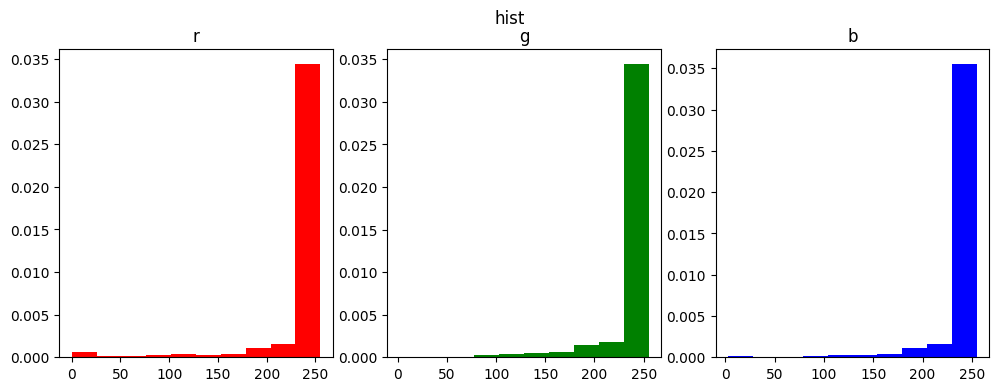

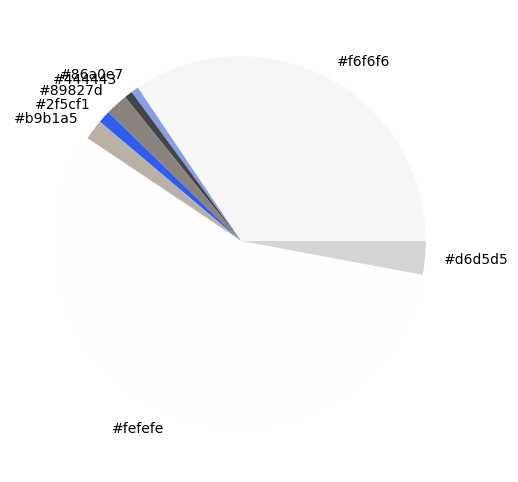

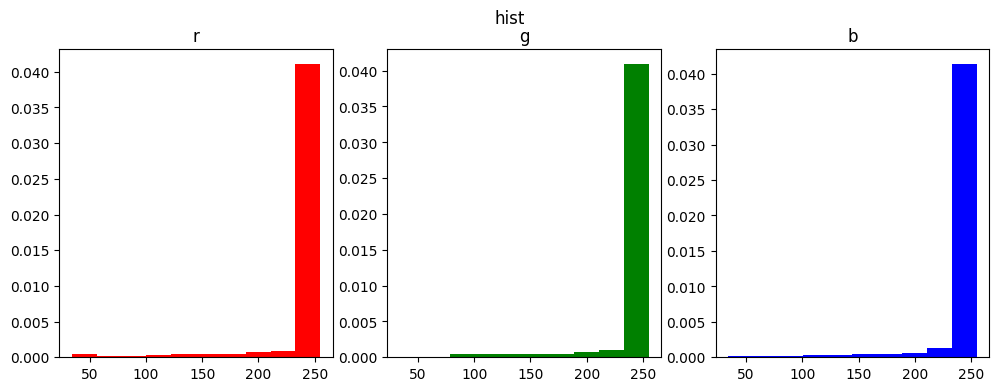

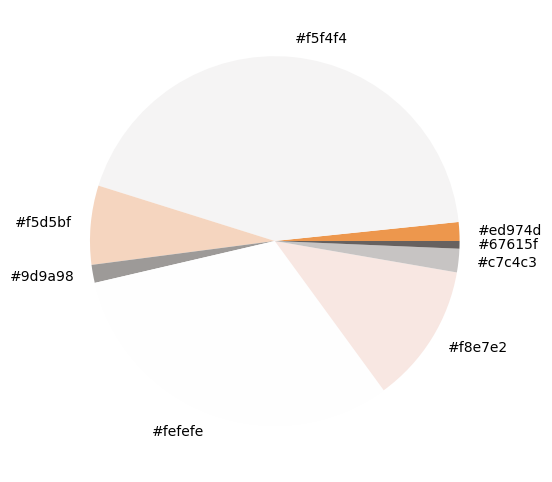

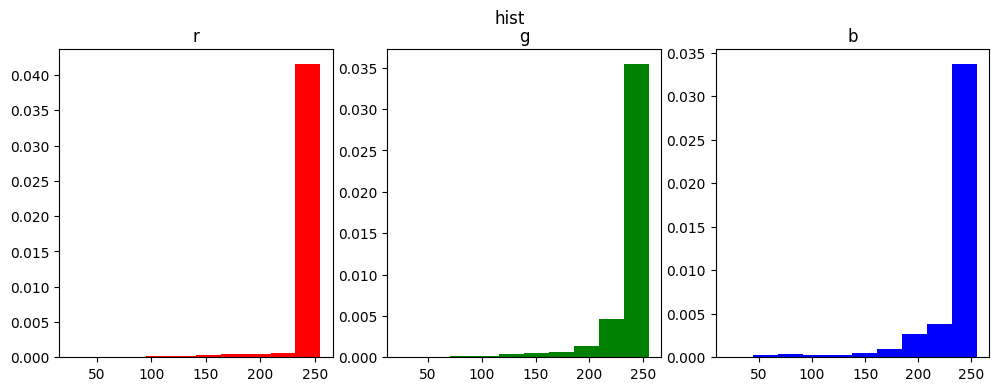

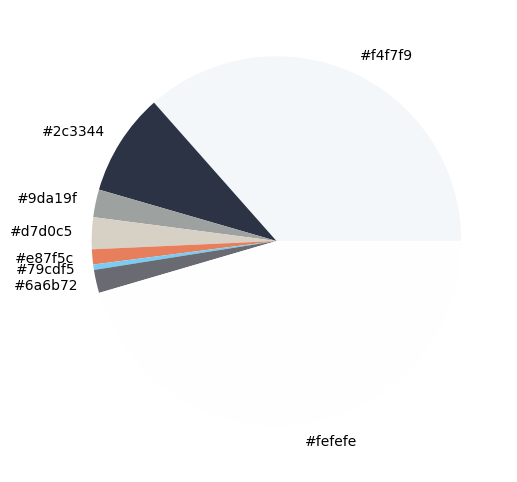

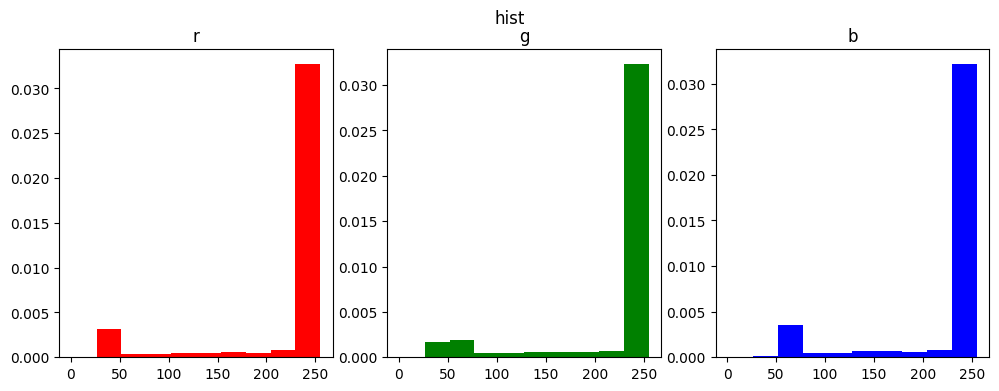

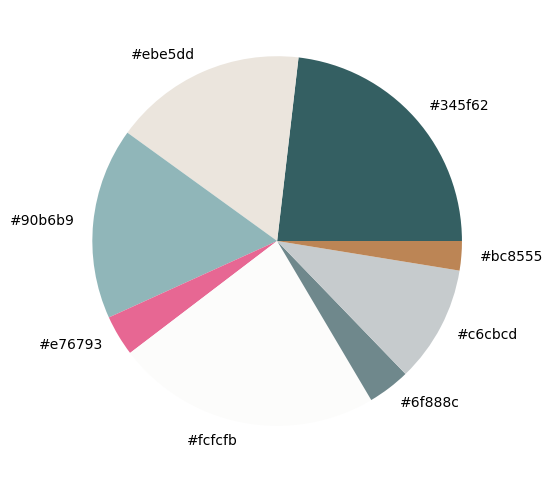

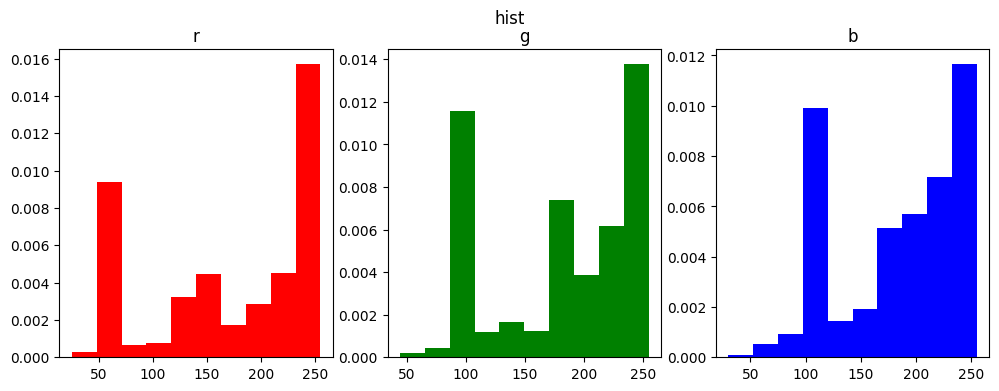

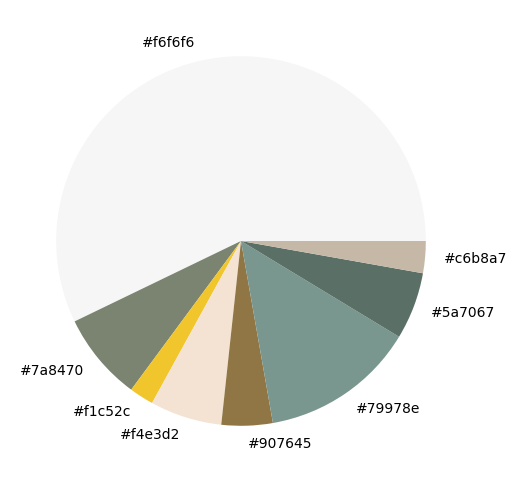

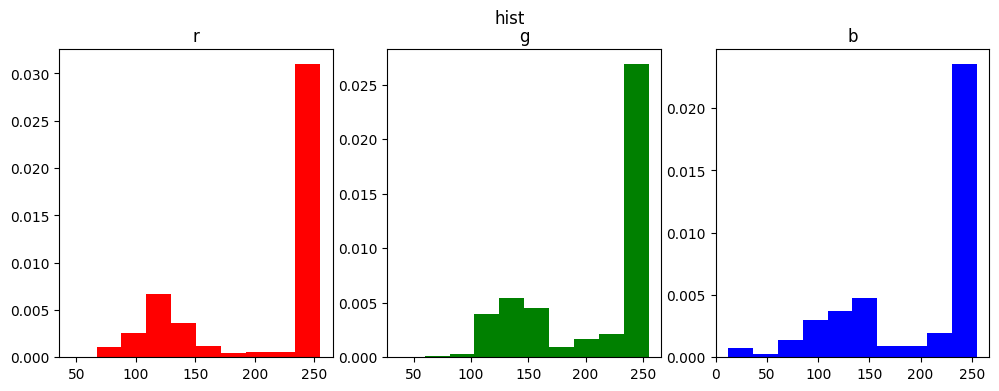

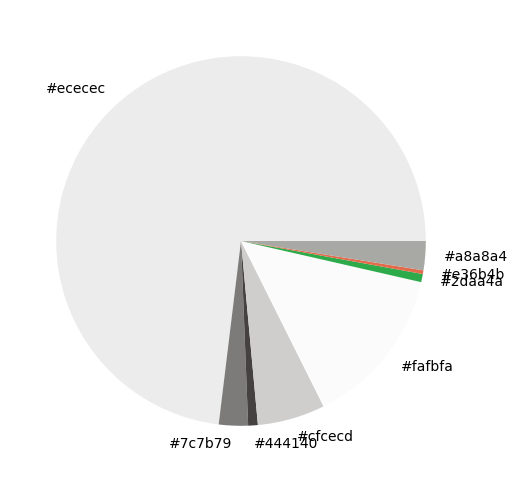

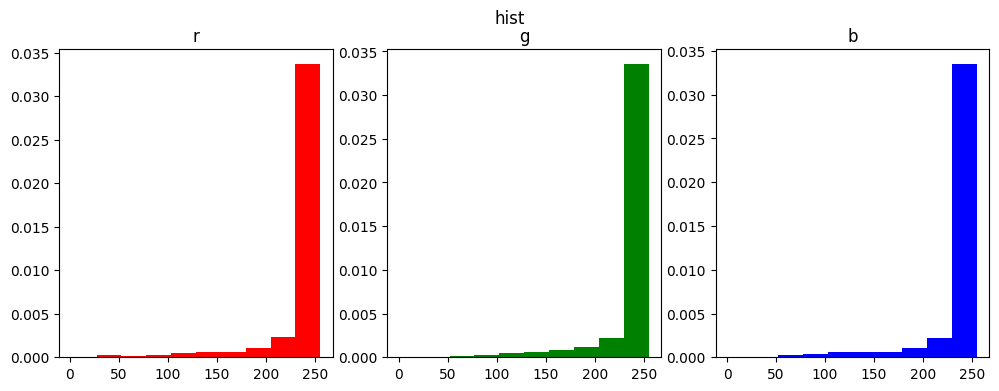

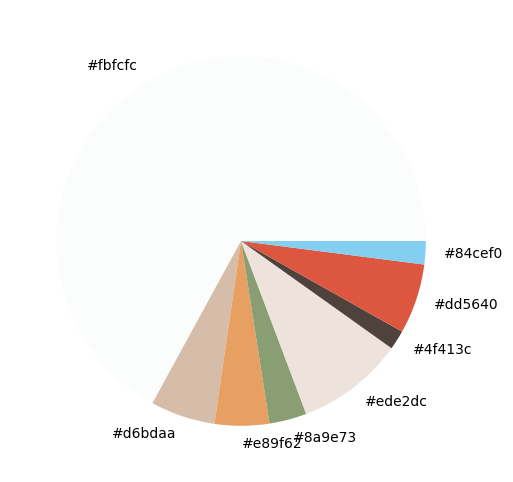

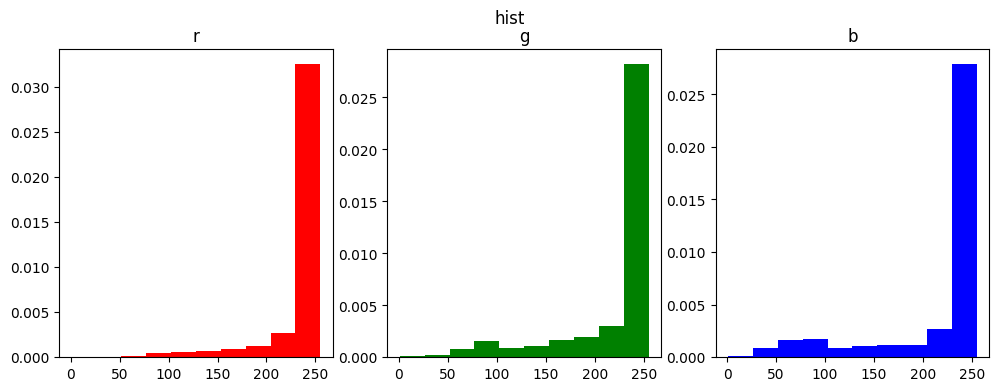

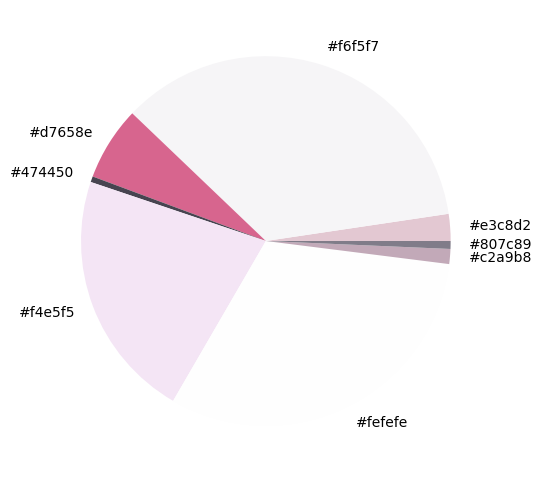

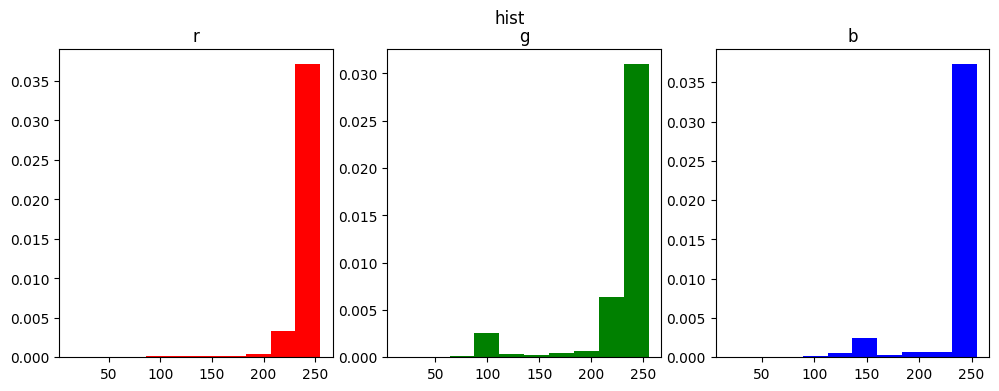

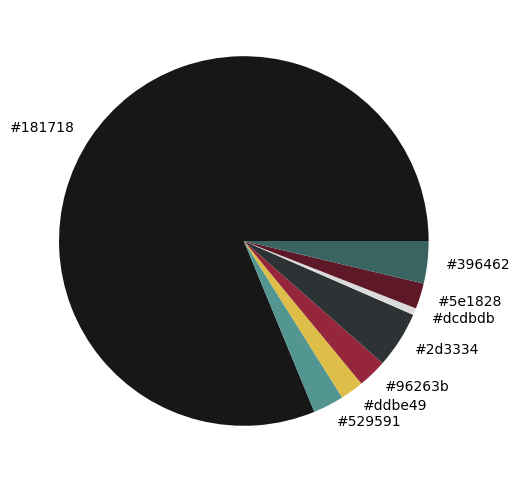

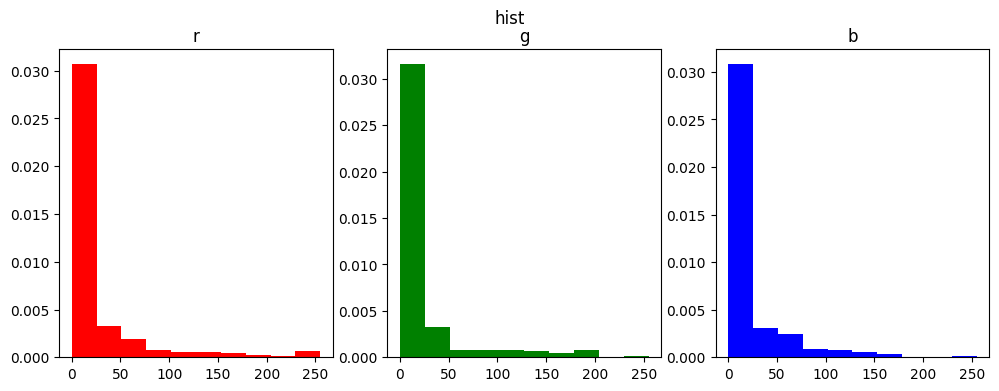

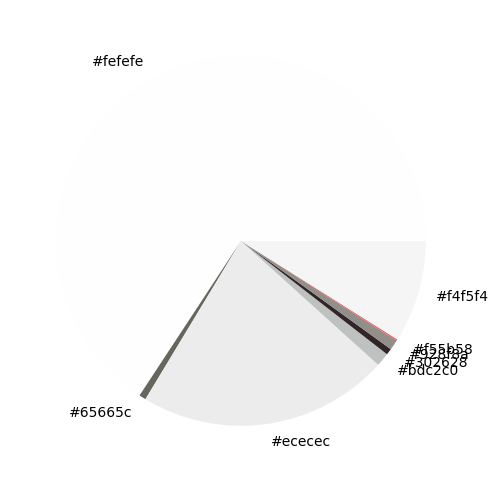

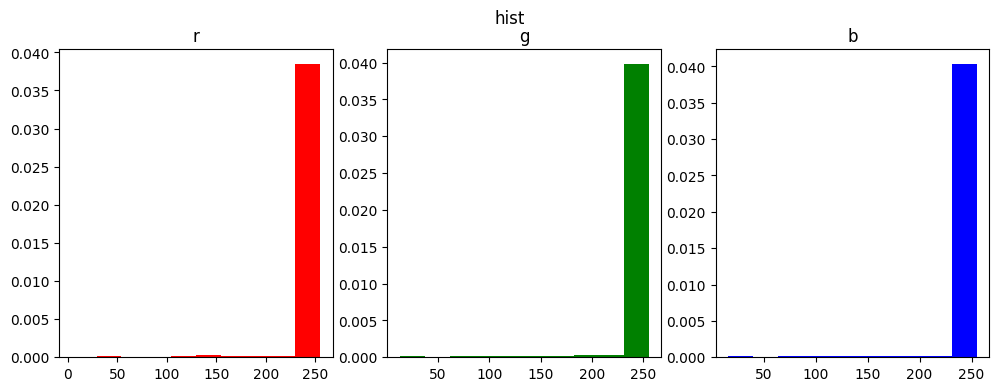

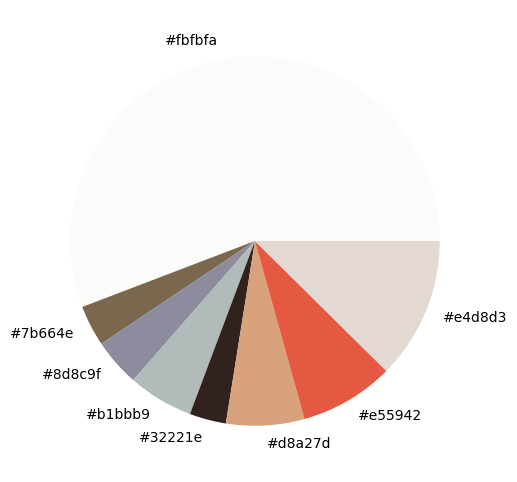

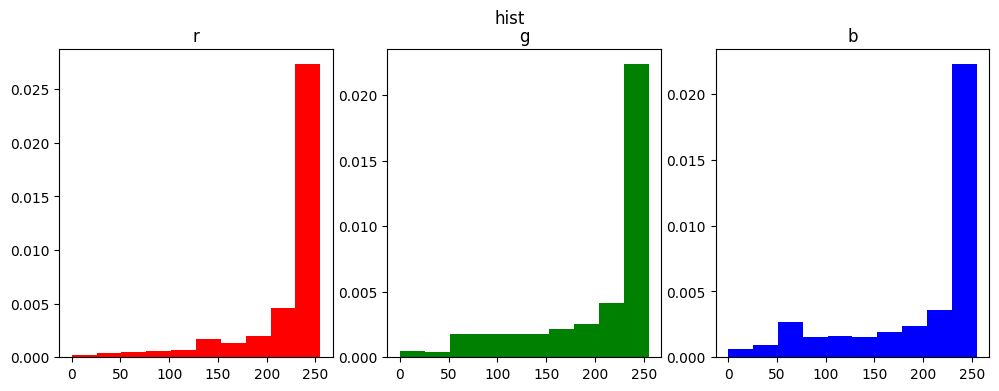

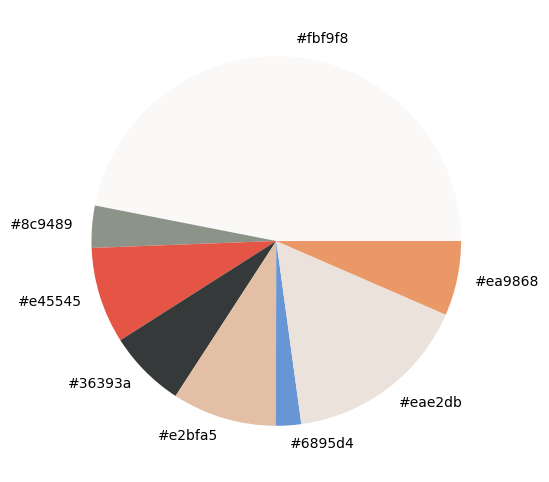

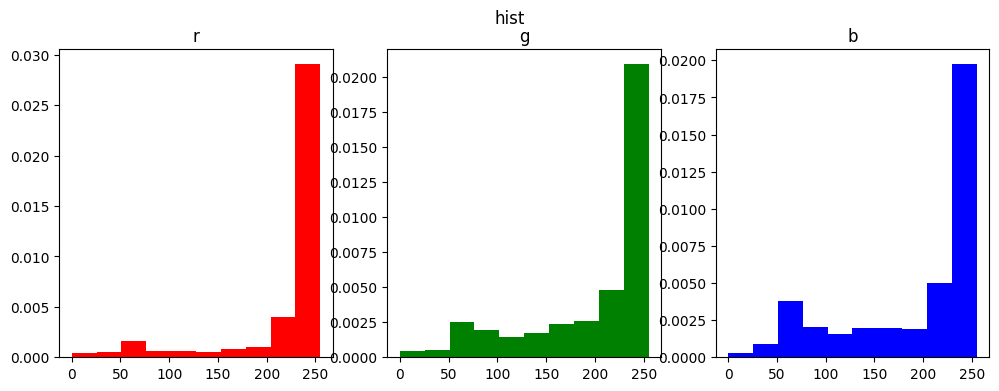

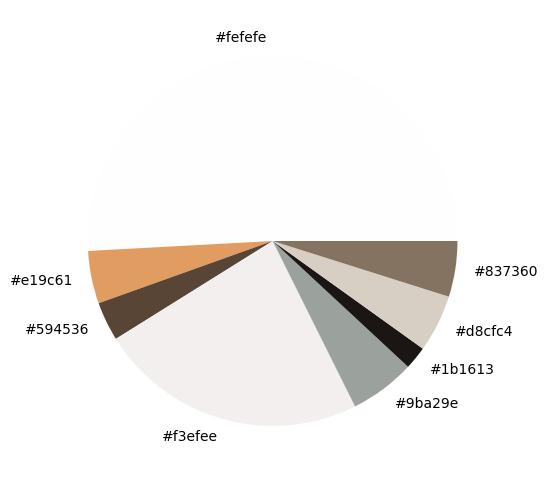

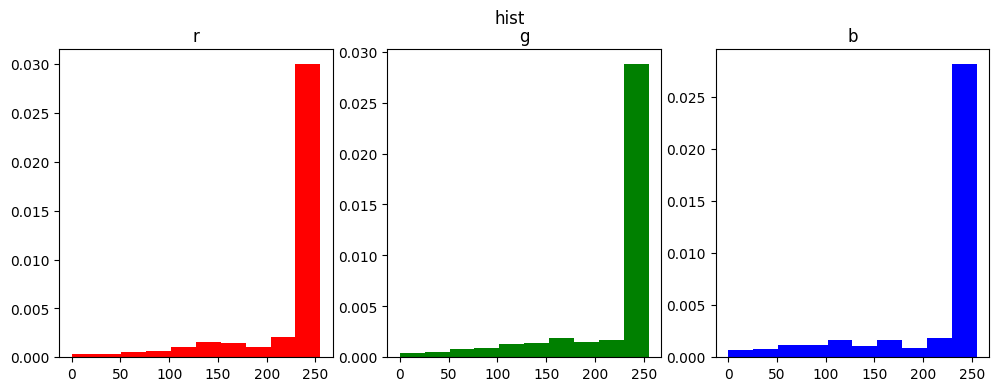

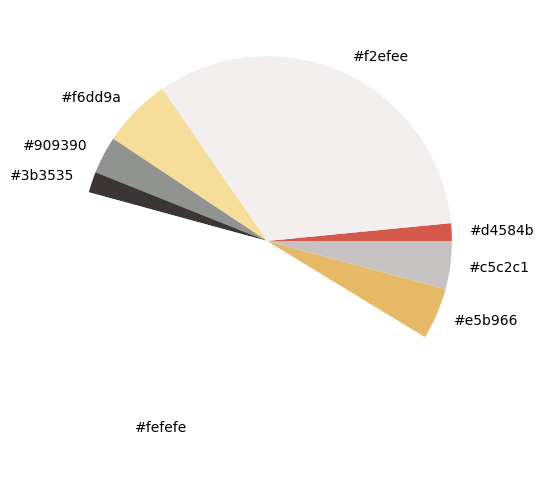

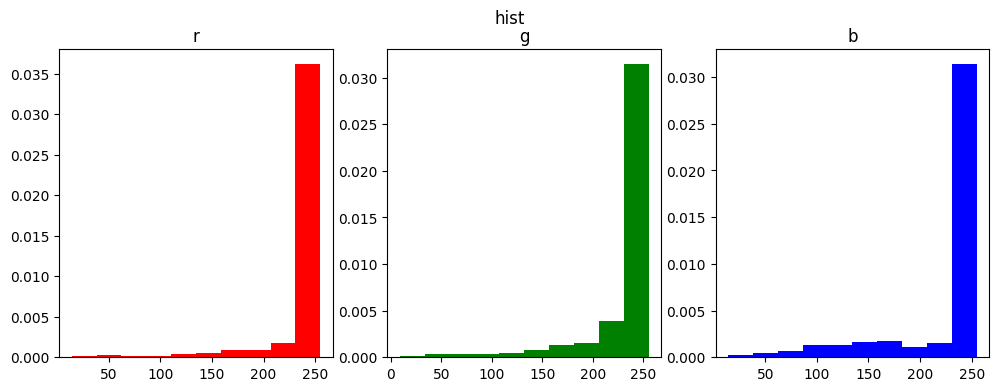

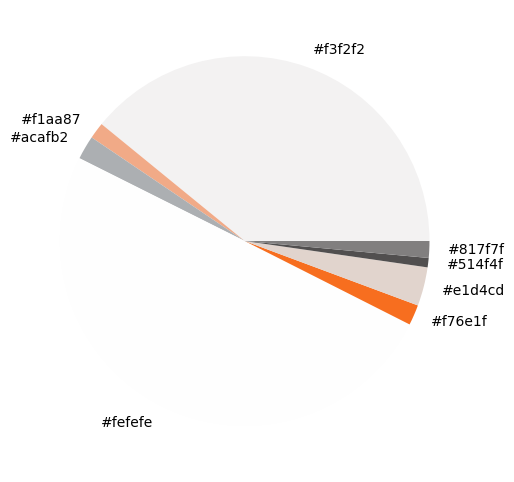

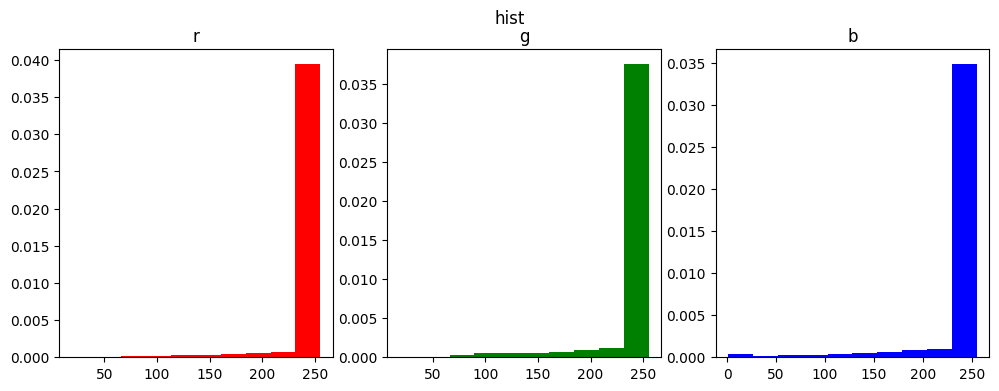

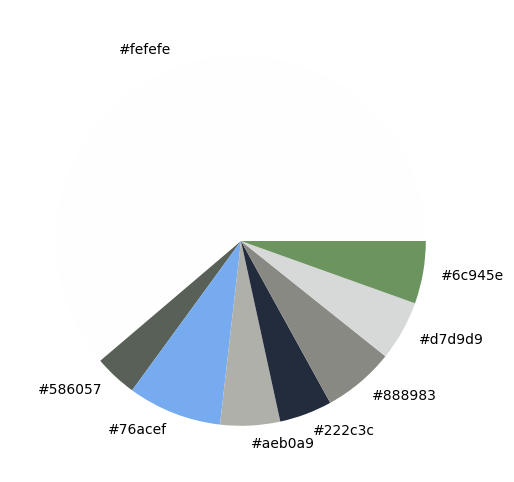

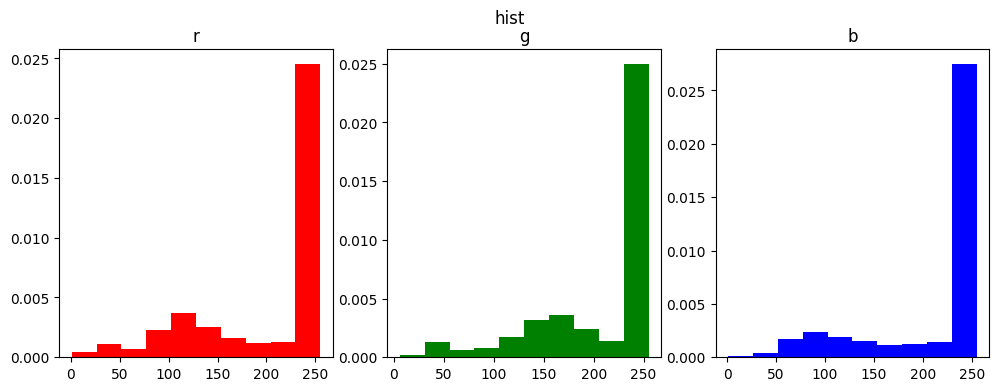

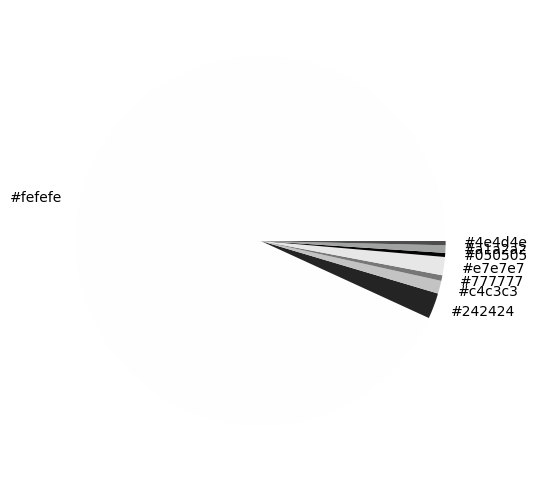

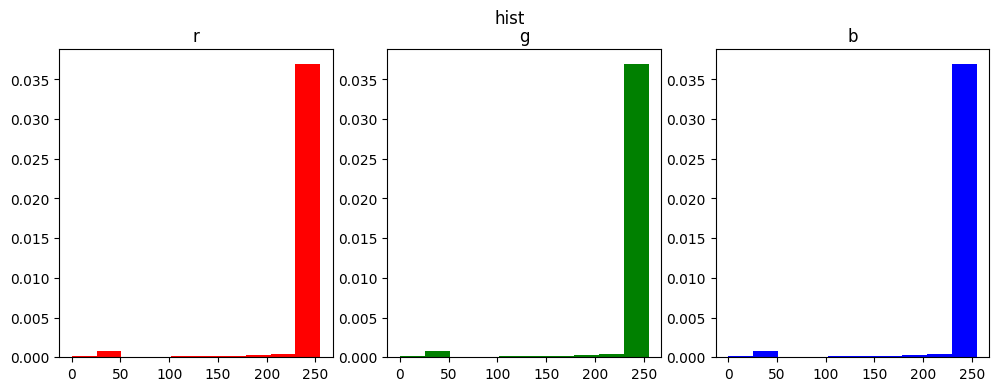

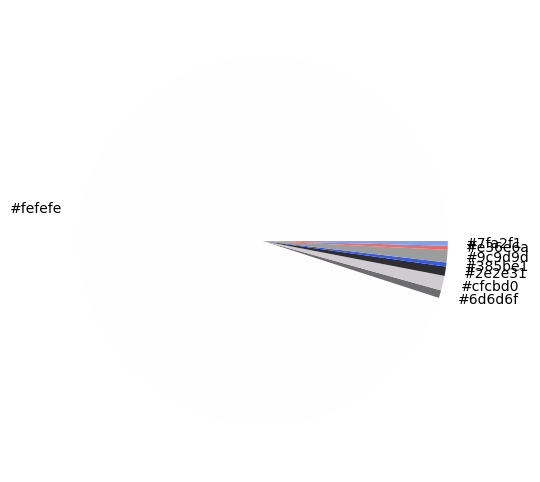

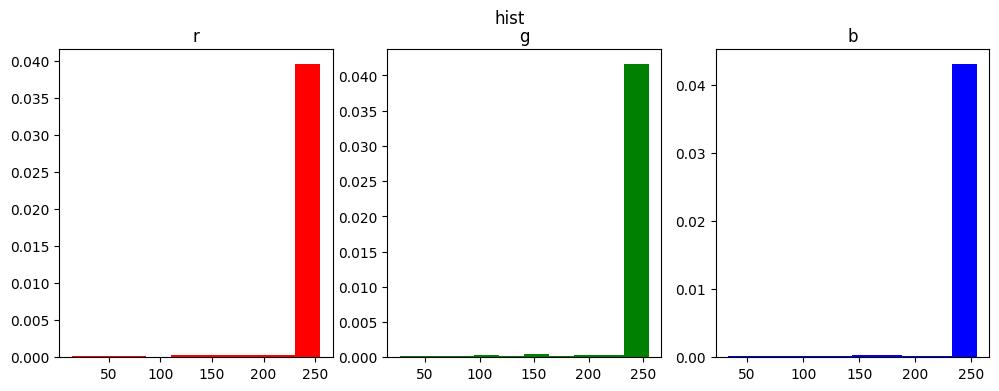

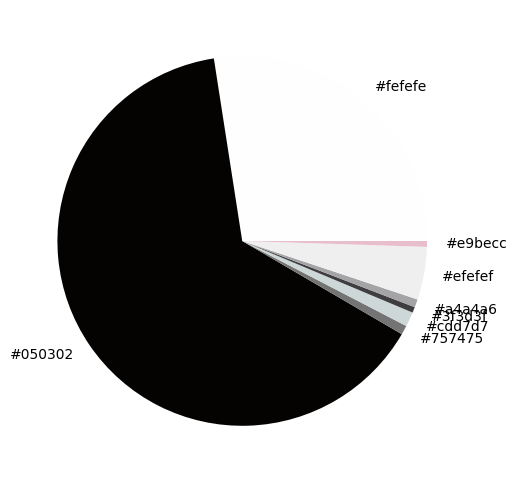

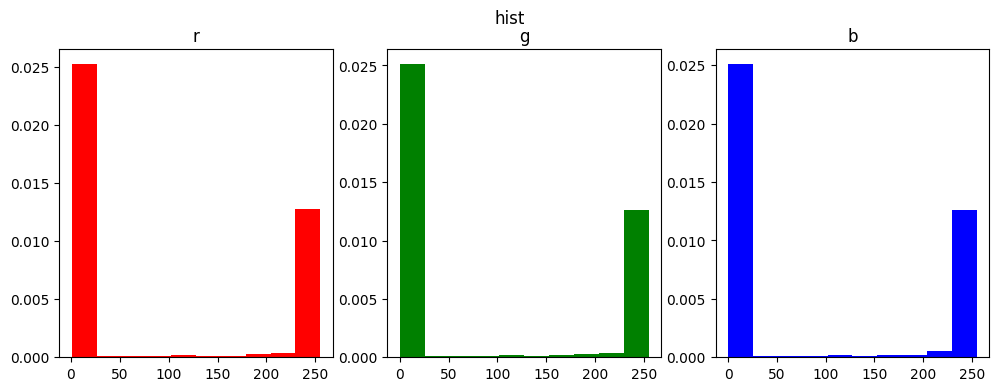

In [12]:
files = os.listdir('/Users/rechel/Desktop/abc')

for item in files:
    if not item.endswith(".jpg"):
        continue
    # print(item)
    image = get_image('/Users/rechel/Desktop/abc/' + item)
    colors = get_colors(image, 8, False, '/Users/rechel/Desktop/abc/results/' + item)
    print(item,colors, np.std(colors, 0))
    ent = entropy(image, '/Users/rechel/Desktop/abc/hists/' + item)
    print("entropies in r, g, b:", ent)
    print(sum(ent))
    # break